In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
df = pd.read_csv("../data/master_grouped_ccy.csv")
df = df.drop(columns="Unnamed: 0")
df.head()

,continent,country,year,suicides_no,population,gdp_per_capita ($),s_rate
0,Europe,Albania,1987,73,2709600,796,2.69
1,Europe,Albania,1988,63,2764300,769,2.28
2,Europe,Albania,1989,68,2803100,833,2.43
3,Europe,Albania,1992,47,2822500,251,1.67
4,Europe,Albania,1993,73,2807300,437,2.60


### We want to run a linear regression between suicides rate and GDP per capita

In [4]:
df_cor = sm.add_constant(df)

In [19]:
df_cor_c = df_cor[df_cor["country"]=="Lithuania"]

In [20]:
y = df_cor_c["s_rate"]
X = df_cor_c[["const", "gdp_per_capita ($)"]]

lin_reg = sm.OLS(y,X)
results = lin_reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 s_rate   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     116.7
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           8.50e-10
Time:                        17:18:28   Log-Likelihood:                -51.279
No. Observations:                  22   AIC:                             106.6
Df Residuals:                      20   BIC:                             108.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 51.0660      1.106     46.159      0.000      48.758      53.374
gdp_per_capita ($)    -0.0011      0.000    -10.803      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        4.154   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.125   Jarque-Bera (JB):                2.394
Skew:                          -0.384   Prob(JB):                        0.302
Kurtosis:                       4.422   Cond. No.                     2.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### We also want to plot the correlation to help us visualize it

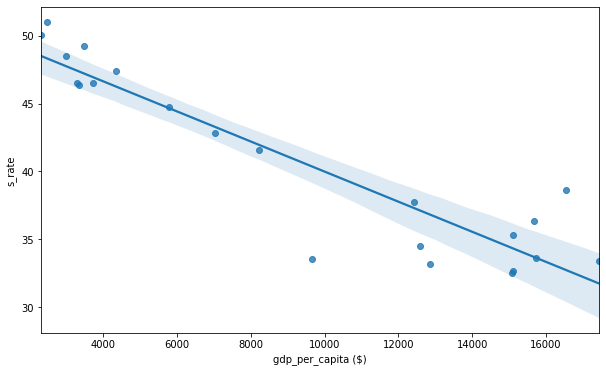

In [21]:
fig, ax = plt.subplots(figsize=(10,6))

sns.regplot(data=df_cor_c,
                x=df_cor_c["gdp_per_capita ($)"],
                y=df_cor_c["s_rate"],
                ax=ax);


### Now we use our previous codes to create two functions.

In [22]:
def gdp_suicides_plot(country):
    df_cor = sm.add_constant(df)
    df_cor_c = df_cor[df_cor["country"]==country]
  
    
    fig, ax = plt.subplots(figsize=(10,6))

    return sns.regplot(data=df_cor_c,
                x=df_cor_c["gdp_per_capita ($)"],
                y=df_cor_c["s_rate"],
                ax=ax);

def ols_results(country):
    df_cor = sm.add_constant(df)
    df_cor_c = df_cor[df_cor["country"]==country]
    y = df_cor_c["s_rate"]
    X = df_cor_c[["const", "gdp_per_capita ($)"]]

    lin_reg = sm.OLS(y,X)
    results = lin_reg.fit()
    return results.summary()

### We can now check the correlation between GPD per capita and suicides rate per country and plot that correlation simply by indicating the name of the country

In [25]:
ols_results("Lithuania")

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 s_rate   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     116.7
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           8.50e-10
Time:                        17:22:28   Log-Likelihood:                -51.279
No. Observations:                  22   AIC:                             106.6
Df Residuals:                      20   BIC:                             108.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 51.0660      1.106     46.159      0.000      48.758      53.374
gdp_per_capita ($)    -0.0011      0.000    -10.803      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        4.154   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.125   Jarque-Bera (JB):                2.394
Skew:                          -0.384   Prob(JB):                        0.302
Kurtosis:                       4.422   Cond. No.                     2.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

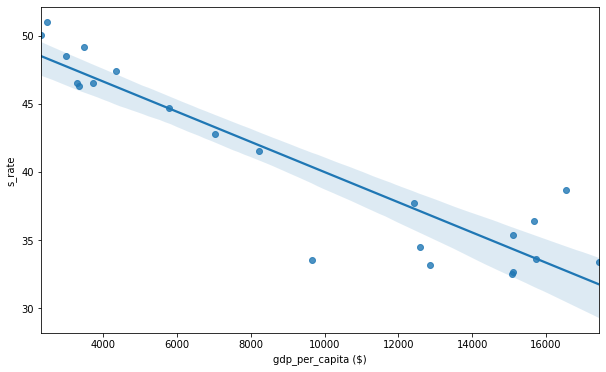

In [26]:
gdp_suicides_plot("Lithuania")